In [1]:
# Data Wrangling
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

# Visualization
import matplotlib.pylab as plt
from matplotlib import font_manager, rc
import seaborn as sns
%matplotlib inline

# EDA
import klib

# Preprocessing & Feature Engineering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import SelectPercentile

# Hyperparameter Optimization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Modeling
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVC
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.base import RegressorMixin
from sklearn.ensemble import ExtraTreesRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import Ridge

# Evaluation
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# Utility
import os
import time
import random
import warnings; warnings.filterwarnings("ignore")
from IPython.display import Image
import pickle
from tqdm import tqdm
import platform
from itertools import combinations
from scipy.stats.mstats import gmean

from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow import keras

In [2]:
#matplotlib 한글깨짐 지원

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...')
rc('axes', unicode_minus=False)  

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df_train = pd.read_csv(os.path.abspath("../input")+'/피쳐_train.csv',encoding = 'utf-8')
df_test = pd.read_csv(os.path.abspath("../input")+'/피쳐_test.csv',encoding = 'utf-8')
df = pd.concat([df_train, df_test])
df = df.iloc[:,1:]
y_train = pd.read_csv(os.path.abspath("../input")+'/y_train.csv').age
IDtest = df_test.custid.unique()

In [5]:
a = pd.read_csv(os.path.abspath("../input")+'/brd_nm원핫.csv',encoding = 'utf-8')
b = pd.read_csv(os.path.abspath("../input")+'/brd_nm원핫_test.csv',encoding = 'utf-8')
c = pd.read_csv(os.path.abspath("../input")+'/city원핫.csv',encoding = 'utf-8')
d = pd.read_csv(os.path.abspath("../input")+'/city원핫_test.csv',encoding = 'utf-8')
e = pd.read_csv(os.path.abspath("../input")+'/월별실구매액합.csv',encoding = 'utf-8')
f = pd.read_csv(os.path.abspath("../input")+'/월별실구매액합_test.csv',encoding = 'utf-8')
g = pd.read_csv(os.path.abspath("../input")+'/요일별실구매액합.csv',encoding = 'utf-8')
h = pd.read_csv(os.path.abspath("../input")+'/요일별실구매액합_test.csv',encoding = 'utf-8')
i = pd.read_csv(os.path.abspath("../input")+'/계절별실구매액합.csv',encoding = 'utf-8')
j = pd.read_csv(os.path.abspath("../input")+'/계절별실구매액합_test.csv',encoding = 'utf-8')
k = pd.read_csv(os.path.abspath("../input")+'/지점별실구매액합.csv',encoding = 'utf-8')
l = pd.read_csv(os.path.abspath("../input")+'/지점별실구매액합_test.csv',encoding = 'utf-8')
m = pd.read_csv(os.path.abspath("../input")+'/part_nm원핫.csv',encoding = 'utf-8')
n = pd.read_csv(os.path.abspath("../input")+'/part_nm원핫_test.csv',encoding = 'utf-8')
s = pd.read_csv(os.path.abspath("../input")+'/지점별tot환불합.csv',encoding = 'utf-8')
t = pd.read_csv(os.path.abspath("../input")+'/지점별tot환불합_test.csv',encoding = 'utf-8')
u = pd.read_csv(os.path.abspath("../input")+'/pc별할부평균.csv',encoding = 'utf-8')
v = pd.read_csv(os.path.abspath("../input")+'/pc별할부평균_test.csv',encoding = 'utf-8')
w = pd.read_csv(os.path.abspath("../input")+'/part별수입여부합.csv',encoding = 'utf-8')
x = pd.read_csv(os.path.abspath("../input")+'/part별수입여부합_test.csv',encoding = 'utf-8')

In [6]:
br = pd.concat([a.iloc[:,1:],b.iloc[:,1:]])
ci = pd.concat([c.iloc[:,1:],d.iloc[:,1:]])
mo = pd.concat([e.iloc[:,1:],f.iloc[:,1:]])
da = pd.concat([g.iloc[:,1:],h.iloc[:,1:]])
se = pd.concat([i.iloc[:,1:],j.iloc[:,1:]])
kl = pd.concat([k.iloc[:,1:],l.iloc[:,1:]])
pa = pd.concat([m.iloc[:,1:],n.iloc[:,1:]])
st = pd.concat([s.iloc[:,1:],t.iloc[:,1:]])
uv = pd.concat([u.iloc[:,1:],v.iloc[:,1:]])
wx = pd.concat([w.iloc[:,1:],x.iloc[:,1:]])

In [7]:
br.shape, ci.shape, mo.shape, da.shape, se.shape, kl.shape, pa.shape, st.shape, uv.shape, wx.shape

((35967, 1873),
 (35967, 3),
 (35967, 12),
 (35967, 7),
 (35967, 4),
 (35967, 4),
 (35967, 23),
 (19183, 5),
 (35967, 78),
 (35967, 31))

In [8]:
df.주구매시간 = df.주구매시간.astype('str')
df.주구매월 = df.주구매월.astype('str')
del df['중복구매상품']

In [9]:
# 범주형 변수와 수치형 변수를 분리
cid = df.iloc[:,:1].reset_index()
del cid['index']
df=df.drop('custid', axis=1)
cat = df.select_dtypes(include=['object']).columns.to_list()
num = df.select_dtypes(exclude='object').columns.to_list()

Displaying absolute correlations above the threshold (0.3). Specify a positive "threshold" to limit the results further.


<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

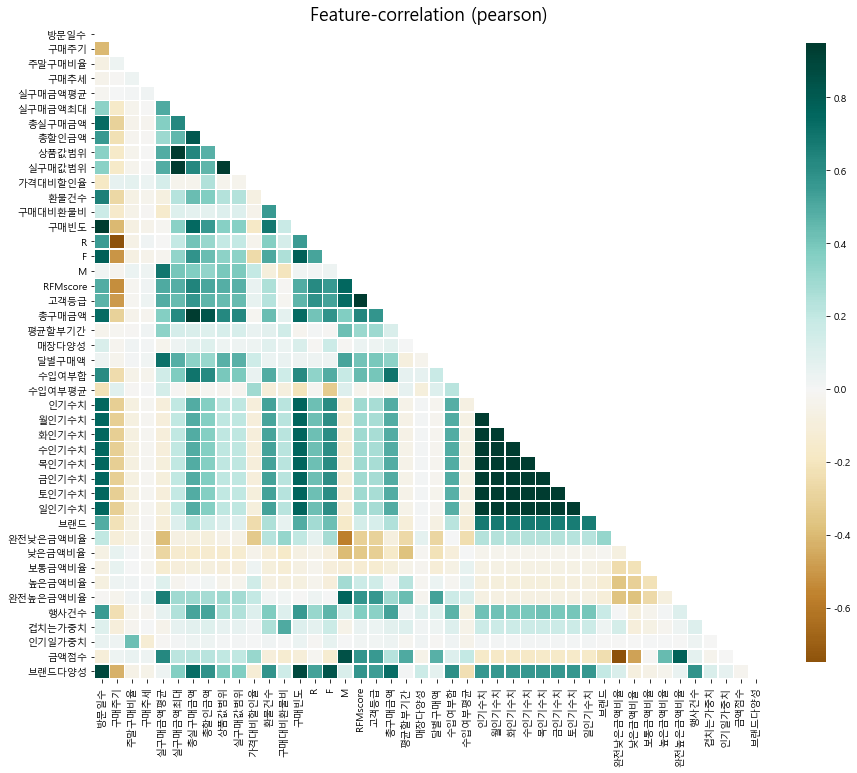

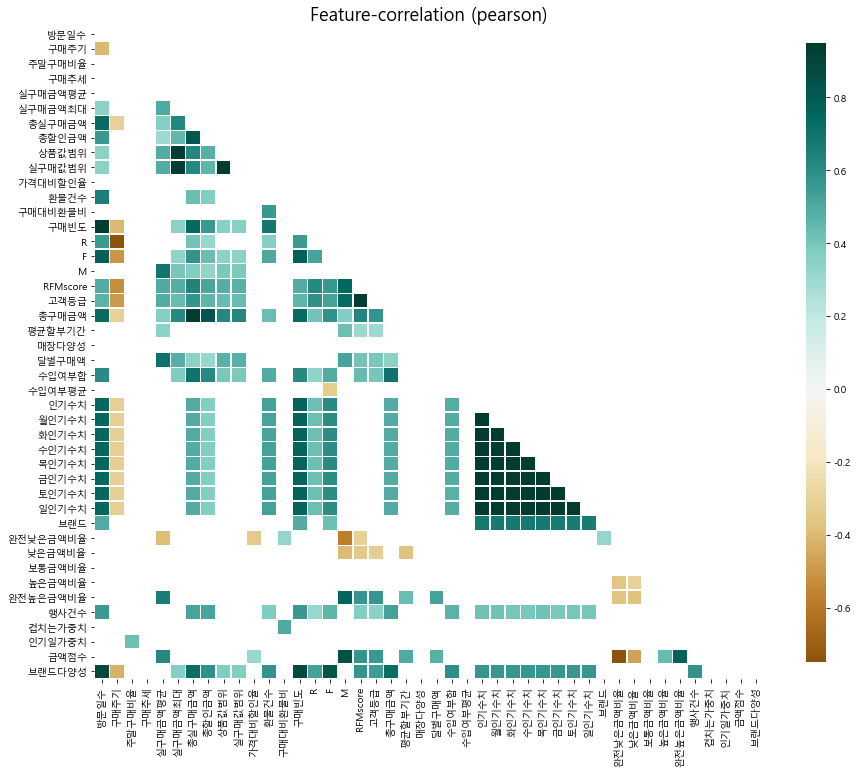

In [10]:
# 속성간 유사성 파악

klib.corr_plot(df, annot=False, figsize=(15,12))
klib.corr_plot(df, split='high', annot=False, figsize=(15,12))

<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

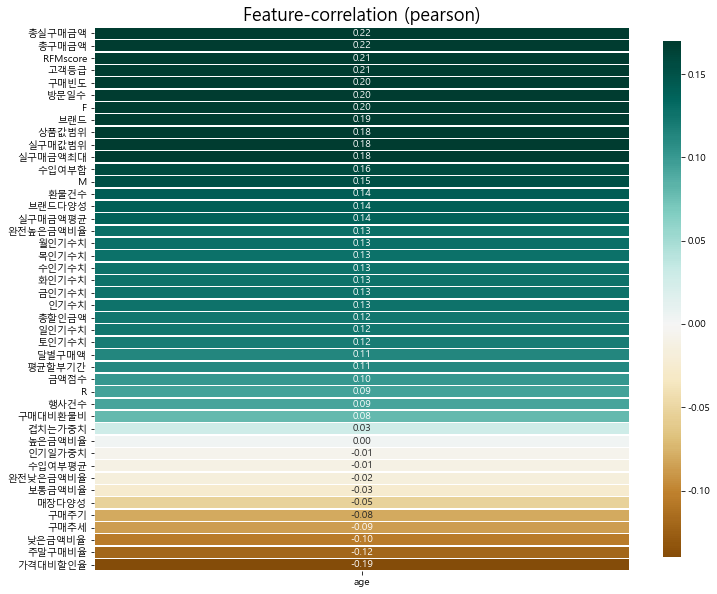

In [11]:
# 속성별 예측 능력 파악 = 높으면 좋은피쳐인거

klib.corr_plot(pd.concat([df[:21587], y_train], axis=1), target='age')

In [12]:
cat = df.select_dtypes(include=['object']).columns.to_list()
num = df.select_dtypes(exclude='object').columns.to_list()

In [13]:
# 범주형 변수에 One-Hot-Encoding 후 수치형 변수와 병합

if len(cat) > 0:
    df = pd.concat([df[num], pd.get_dummies(df[cat])], axis=1)
else:
    df = df[num]

df

,방문일수,구매주기,주말구매비율,구매추세,실구매금액평균,실구매금액최대,총실구매금액,총할인금액,상품값범위,실구매값범위,...,가격유동점수_K,가격유동점수_L,가격유동점수_M,가격유동점수_O,가격유동점수_P,가격유동점수_Q,가격유동점수_R,가격유동점수_S,가격유동점수_VIP,가격유동점수_VVIP
0,11,26,0.636364,-0.07,142527.272727,409500,1567800,174200,416000,374400,...,0,0,0,0,0,0,0,0,0,0
1,9,14,0.363636,-0.05,317796.363636,1416000,3495760,255090,1270000,1284600,...,0,0,0,0,0,0,0,0,0,0
2,30,11,0.366667,-0.05,73628.000000,589950,2208840,91660,616800,585750,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0.250000,-0.11,255800.000000,560000,1023200,21800,511000,511000,...,0,0,0,0,0,0,0,0,0,0
4,32,10,0.156250,-0.36,146640.593750,613800,4692499,361260,661665,593465,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14375,4,14,0.000000,0.02,150100.000000,401850,600400,31600,371000,352450,...,0,0,0,0,0,0,0,0,0,0
14376,1,0,0.000000,0.03,202350.000000,202350,202350,10650,0,0,...,0,0,0,0,0,0,0,0,0,1
14377,2,142,0.500000,0.01,104975.000000,159600,209950,11050,115000,109250,...,0,0,0,0,0,0,0,0,0,0
14378,4,0,0.000000,0.11,34882.250000,66500,139529,3500,50000,46500,...,0,0,0,0,0,0,0,1,0,0


In [14]:
df = df.reset_index()
del df['index']
br = br.reset_index()
del br['index']
ci = ci.reset_index()
del ci['index']
mo = mo.reset_index()
del mo['index']
da = da.reset_index()
del da['index']
se = se.reset_index()
del se['index']
kl = kl.reset_index()
del kl['index']
pa = pa.reset_index()
del pa['index']
st = st.reset_index()
del st['index']
uv = uv.reset_index()
del uv['index']
wx = wx.reset_index()
del wx['index']

In [15]:
df=df.merge(br, how='left',left_on=df.index, right_on=br.index)
del df['key_0']

In [16]:
df=df.merge(ci, how='left', left_on=df.index, right_on=ci.index)
del df['key_0']

In [17]:
df=df.merge(mo, how='left', left_on=df.index, right_on=mo.index)
del df['key_0']

In [18]:
df=df.merge(da, how='left', left_on=df.index, right_on=da.index)
del df['key_0']

In [19]:
df=df.merge(se, how='left', left_on=df.index, right_on=se.index)
del df['key_0']

In [20]:
df=df.merge(kl, how='left', left_on=df.index, right_on=kl.index)
del df['key_0']

In [21]:
df=df.merge(pa, how='left', left_on=df.index, right_on =pa.index)
del df['key_0']

In [22]:
df=df.merge(cid, how='left', left_on=df.index, right_on =cid.index)
del df['key_0']

In [23]:
df=df.merge(st, how='left', on='custid')

In [24]:
df=df.merge(uv, how='left', on='custid')

In [25]:
df=df.merge(wx, how='left', on='custid')

In [26]:
df=df.drop('custid', axis=1)

In [27]:
df = df.fillna(0)

2등팀 feature 추가 

In [28]:
feature_2 = pd.read_csv(os.path.abspath("../input")+'/2등피쳐_W2V빼고.csv',encoding = 'utf-8')
feature_2_te = pd.read_csv(os.path.abspath("../input")+'/2등피쳐_W2V빼고_test.csv',encoding = 'utf-8')
featuree = pd.concat([feature_2,feature_2_te])

In [29]:
del featuree['Unnamed: 0']

In [30]:
featuree = featuree.reset_index()
del featuree['index']

In [31]:
df=df.merge(featuree, how='left', left_on=df.index, right_on =featuree.index)
del df['key_0']

1등 feature 추가

In [32]:
f = pd.read_csv(os.path.abspath("../input")+'/1등피쳐_train.csv',encoding = 'utf-8')
f_te = pd.read_csv(os.path.abspath("../input")+'/1등피쳐_test.csv',encoding = 'utf-8')
ft = pd.concat([f,f_te])

In [33]:
del ft['Unnamed: 0']

In [34]:
del ft['custid']

In [35]:
ft = ft.iloc[:,:13634]

In [36]:
ft = ft.reset_index()
del ft['index']

In [37]:
df=df.merge(ft, how='left', left_on=df.index, right_on =ft.index)
del df['key_0']

In [38]:
df.shape

(35967, 19096)

## feature selection

In [39]:
X_train = df.iloc[:21587]
X_test = df.iloc[21587:]

In [40]:
X_train.shape, X_test.shape

((21587, 19096), (14380, 19096))

100%|███████████████████████████████████████████████████████████████████████████████| 18/18 [1:07:47<00:00, 225.99s/it]


(55, -66.02400103831468)


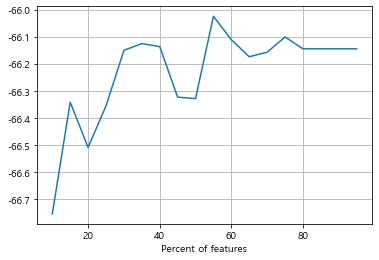

In [41]:
# 사용할 모델 설정 (속도가 빠른 모델 사용 권장)
model = LGBMRegressor(random_state=0)

# 각 특성과 타깃(class) 사이에 유의한 통계적 관계가 있는지 계산하여 특성을 선택하는 방법 
cv_scores = []
for p in tqdm(range(10,100,5)): # 5%로부터 100%로까지 다 돌려보겠다
    X_new = SelectPercentile(percentile=p).fit_transform(X_train, y_train)    
    cv_score = cross_val_score(model, X_new, y_train, scoring='neg_mean_squared_error', cv=5).mean()
    cv_scores.append((p,cv_score))

# Print the best percentile
best_score = cv_scores[np.argmax([score for _, score in cv_scores])]
print(best_score)

# Plot the performance change with p
plt.plot([k for k, _ in cv_scores], [score for _, score in cv_scores])
plt.xlabel('Percent of features')
plt.grid()

In [42]:
# 과적합을 피하기 위해 최적의 p값 주변의 값을 선택하는게 더 나은 결과를 얻을 수 있다. 
fs = SelectPercentile(percentile=best_score[0]).fit(X_train, y_train)
X_train = fs.transform(X_train)
X_test = fs.transform(X_test)

In [43]:
print(X_train.shape)
print(df.columns[fs.get_support()].tolist())

(21587, 10502)
['방문일수', '구매주기', '주말구매비율', '구매추세', '실구매금액평균', '실구매금액최대', '총실구매금액', '총할인금액', '상품값범위', '실구매값범위', '가격대비할인율', '환불건수', '구매대비환불비', '구매빈도', 'R', 'F', 'M', 'RFMscore', '고객등급', '총구매금액', '평균할부기간', '매장다양성', '달별구매액', '수입여부합', '수입여부평균', '인기수치', '월인기수치', '화인기수치', '수인기수치', '목인기수치', '금인기수치', '토인기수치', '일인기수치', '브랜드', '완전낮은금액비율', '낮은금액비율', '보통금액비율', '높은금액비율', '완전높은금액비율', '행사건수', '겹치는가중치', '인기일가중치', '금액점수', '브랜드다양성', '주구매시간_11', '주구매시간_12', '주구매시간_13', '주구매시간_14', '주구매시간_15', '주구매시간_16', '주구매시간_18', '주구매시간_19', '주구매시간_20', '주구매시간_9', '소득별연령_가난병아리', '소득별연령_병아리', '소득별연령_부자고령', '소득별연령_부자병아리', '소득별연령_부자중년', '소득별연령_부자청년', '소득별연령_중년', '소득별연령_청년', '할인고객_낫굿', '할인고객_낫배드', '할인고객_낫쏘쏘', '할인고객_배리베드', '할인고객_베리굿', '할인고객_베리배드', '할인고객_베리쏘쏘', '할인고객_쏘쏘굿', '할인고객_쏘쏘배드', '할인고객_쏘쏘쏘쏘', '사람_드물게_많은금액', '사람_드물게_적은금액', '사람_자주_많은금액', '사람_자주_적은금액', '연령1_20대', '연령1_40대', '연령1_50대', '연령1_60대', '주상품군_골프', '주상품군_내의란제리', '주상품군_농산물', '주상품군_니트/단품', '주상품군_디자이너부띠끄', '주상품군_디자이너부띠크', '주상품군_디자이너부틱', '주상품군_로얄부띠끄', '주상품군_로얄부틱', '주상품

In [66]:
#pd.DataFrame(X_train).to_csv('1,2등,우리_selection.csv')

In [67]:
#pd.DataFrame(X_test).to_csv('1,2등,우리_selection_te.csv')